In [1]:
import socket
import strax
import straxen
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import datetime
from multihist import Hist1d, Histdd
import time
import itertools
import os

from scipy import stats
from straxen import units
from scipy.optimize import curve_fit

import math
import cutax
from straxen.get_corrections import get_correction_from_cmt
from cutax.cuts import *

%load_ext autoreload
%autoreload 2
#import importlib
#importlib.reload(cutax)

import peaks_utility as psu
import drift_diffusion_utility as ddu
import s2widthcut_utility as wcu

ddir = '/dali/lgrandi/dandrea/data'

In [2]:
straxen.print_versions()

,module,version,path,git
0,python,3.8.13,/opt/XENONnT/anaconda/envs/XENONnT_2022.06.3/b...,None
1,strax,1.2.3,/opt/XENONnT/anaconda/envs/XENONnT_2022.06.3/l...,None
2,straxen,1.7.1,/opt/XENONnT/anaconda/envs/XENONnT_2022.06.3/l...,None
3,cutax,1.12.0,/dali/lgrandi/xenonnt/software/cutax/v1.12.0/c...,None


In [3]:
#st = straxen.contexts.xenonnt_online()
#st = cutax.contexts.xenonnt_online()
st = cutax.contexts.xenonnt_v8()

# SR1

In [4]:
dsets = st.select_runs(run_mode='background_linked',available='event_info',
                       exclude_tags=('bad','messy','hot_spot','ramp_up'))

Checking data availability:   0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
dsets1 = dsets[(dsets.end > pd.to_datetime('07/25/2022'))]

In [6]:
bkg_runs1 = dsets1.name.values[:]
print(len(bkg_runs1))

385 1074


In [10]:
evbkg1 = ddu.merge_runs(st,bkg_runs1[:])
#evbkg0.to_pickle(f'{ddir}/SR1_bkg_{bkg_runs0[0]}_{bkg_runs0[-1]}_EventInfo.pkl')
#evbkg0 = pd.read_pickle(f'{ddir}/SR0_bkg_{bkg_runs0[0]}_{bkg_runs0[-1]}_EventInfo.pkl'

Reading runs from 046335 to 047582
n. 4 run 047577 elapsed time: 2.30 s
n. 9 run 047572 elapsed time: 5.45 s
n. 14 run 047567 elapsed time: 8.91 s
n. 19 run 047562 elapsed time: 12.69 s
n. 24 run 047557 elapsed time: 16.96 s
n. 29 run 047552 elapsed time: 21.33 s
n. 34 run 047547 elapsed time: 25.86 s
n. 39 run 047515 elapsed time: 30.65 s
n. 44 run 047510 elapsed time: 35.56 s
n. 49 run 047504 elapsed time: 41.01 s
n. 54 run 047499 elapsed time: 46.65 s
n. 59 run 047494 elapsed time: 52.57 s
n. 64 run 047489 elapsed time: 57.79 s
n. 69 run 047484 elapsed time: 63.82 s
n. 74 run 047478 elapsed time: 69.89 s
n. 79 run 047473 elapsed time: 76.72 s
n. 84 run 047457 elapsed time: 82.31 s
n. 89 run 047452 elapsed time: 88.74 s
n. 94 run 047418 elapsed time: 94.97 s
n. 99 run 047408 elapsed time: 102.09 s
n. 104 run 047402 elapsed time: 109.18 s
n. 109 run 047397 elapsed time: 116.40 s
n. 114 run 047391 elapsed time: 123.40 s
n. 119 run 047385 elapsed time: 131.54 s
n. 124 run 047347 elapsed

In [13]:
FiducialVolume = st.get_single_plugin('030000', 'cut_fiducial_volume')
maskFV = FiducialVolume.cut_by(evbkg1)
ev1 = evbkg1[maskFV]
ev1.to_pickle(f'{ddir}/SR1_bkg_{bkg_runs1[0]}_{bkg_runs1[-1]}_EventInfo.pkl')

In [19]:
#ev1 = pd.read_pickle(f'{ddir}/SR1_bkg_{bkg_runs1[0]}_{bkg_runs1[-1]}_EventInfo.pkl'
ev1 = pd.read_pickle(f'{ddir}/SR1_bkg_047582_046335_EventInfo.pkl')

# SR0

In [4]:
dsets = st.select_runs(run_mode='background_linked',available='event_info',
                       exclude_tags=('bad','messy','hot_spot','ramp_up'))

Checking data availability:   0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
dsets0 = dsets[(dsets.end > pd.to_datetime('11/01/2021')) & (dsets.end < pd.to_datetime('11/30/2022'))]

In [10]:
bkg_runs0 = dsets0.name.values[:]
print(len(bkg_runs0))

1020


In [12]:
evbkg0 = ddu.merge_runs(st,bkg_runs0[:])

Reading runs from 031242 to 033048
n. 4 run 033043 elapsed time: 0.99 s
n. 9 run 033037 elapsed time: 2.48 s
n. 14 run 033032 elapsed time: 3.96 s
n. 19 run 033027 elapsed time: 5.08 s
n. 24 run 033022 elapsed time: 6.92 s
n. 29 run 033017 elapsed time: 8.62 s
n. 34 run 033012 elapsed time: 9.81 s
n. 39 run 033007 elapsed time: 11.04 s
n. 44 run 033002 elapsed time: 12.28 s
n. 49 run 032997 elapsed time: 14.57 s
n. 54 run 032992 elapsed time: 15.87 s
n. 59 run 032987 elapsed time: 17.24 s
n. 64 run 032982 elapsed time: 18.90 s
n. 69 run 032977 elapsed time: 20.77 s
n. 74 run 032972 elapsed time: 22.25 s
n. 79 run 032967 elapsed time: 23.72 s
n. 84 run 032962 elapsed time: 25.63 s
n. 89 run 032957 elapsed time: 27.17 s
n. 94 run 032952 elapsed time: 28.75 s
n. 99 run 032947 elapsed time: 30.53 s
n. 104 run 032925 elapsed time: 32.61 s
n. 109 run 032920 elapsed time: 34.35 s
n. 114 run 032915 elapsed time: 36.10 s
n. 119 run 032910 elapsed time: 39.10 s
n. 124 run 032905 elapsed time: 40

In [13]:
FiducialVolume = st.get_single_plugin('030000', 'cut_fiducial_volume')
maskFV = FiducialVolume.cut_by(evbkg0)
ev0 = evbkg0[maskFV]
ev0.to_pickle(f'{ddir}/SR0_bkg_{bkg_runs0[0]}_{bkg_runs0[-1]}_EventInfo.pkl')

In [14]:
def set_mask(data):
    mask = np.ones(len(data), dtype=bool)
    mask &= data['drift_time'] > 2.0e3
    mask &= data['s2_area'] > 200
    mask &= data['s1_n_channels'] >= 3
    mask &= data['s2_area_fraction_top'] > 0.6
    mask &= data['s2_area_fraction_top'] < 0.9
    return mask

total events 1356166


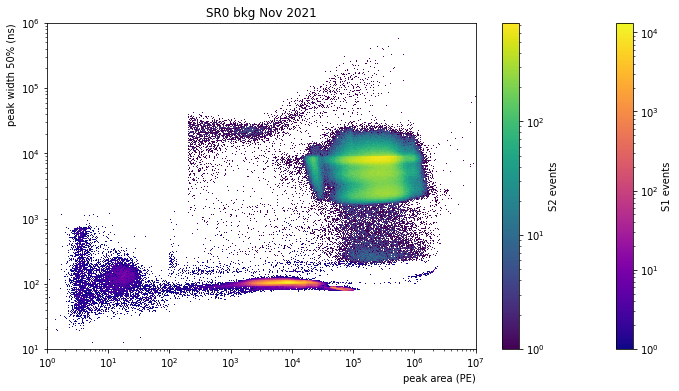

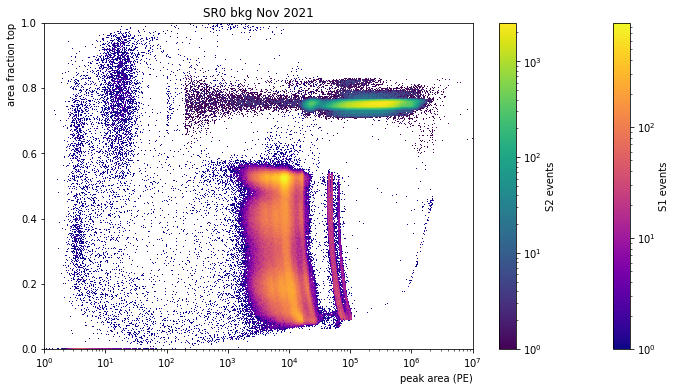

In [15]:
#title='SR1 bkg Sep-Oct 2022'
title='SR0 bkg Nov 2021'
ddu.plot_area_width_aft(ev0[set_mask(ev0)], title)
#wcu.plot_r2z_xy(evv0,title)
#cut_ = wcu.S2WidthCut(evv0, title=title, mod_par=par, bins=400,ext_par=fit_par,
#                      wrange=(0,20), arange = (2.,6.5), plot = 1, perc_plot=0)

In [16]:
def plot_rate_vs_time(events,low = 0, high = 7, low2 = 0, high2 = 1, binning = 500, ndiv = 10):
    first_time = np.min(events['time'])
    livetime = (np.max(events['time'])-first_time)
    ph_s1 = Histdd(events['s1_area'], events['s1_range_50p_area'],
                    bins=(np.logspace(low, high, binning), np.logspace(1, 6, binning)))
    ph_s2 = Histdd(events['s2_area'], events['s2_range_50p_area'],
                    bins=(np.logspace(low, high, binning), np.logspace(1, 6, binning)))
    phcs1 = Histdd(events['s1_area'], events['s1_area_fraction_top'],
                    bins=(np.logspace(low, high, binning), np.linspace(0, 1, binning)))
    phcs2 = Histdd(events['s2_area'], events['s2_area_fraction_top'],
                    bins=(np.logspace(low, high, binning), np.linspace(0, 1, binning)))
    all_rate = len(events)/livetime*1e9
    print(f'Livetime time = {livetime/1e9/3600/24:.2f} days, average rate = {all_rate:.2f} Hz')
    all_rates, slot_times = [], []
    for i in range(ndiv):
        #idx1, idx2 = int(i*(events.last_valid_index())/ndiv), int((i+1)*(events.last_valid_index())/10)
        time1 = first_time + livetime/ndiv*i
        time2 = first_time + livetime/ndiv*(i+1)
        
        slot_time = (time2-time1)/1e9
        central_time = (time1+time2)/2/1e9
        trange = (events['time']>time1) & (events['time']<time2)
        all_rates = np.append(all_rates,len(events[trange])/slot_time)
        day1, day2 = (time1-first_time)/1e9/3600/24, (time2-first_time)/1e9/3600/24
        #print(f'{i}: {day1:.2f} - {day2:.2f} days, {len(events[trange])} in {slot_time:.1f} s')
        #timestamp = events['time'][idx1]/1e9
        slot_times = np.append(slot_times,datetime.datetime.fromtimestamp(central_time))
    
    plt.figure(figsize=(12,6))
    dates = matplotlib.dates.date2num(slot_times + datetime.timedelta(hours=7))
    #plt.plot_date(dates, kr_rates,'o',label='Kr-83m rate')
    plt.plot_date(dates, all_rates,'o',label='total rate')
    #plt.axhline(all_rate,color='r',label='average rate')
    #plt.axvline(x = dates[22],color='black', linestyle = '--',label=f'valve at 0.2 turns')
    #plt.axvline(x = dates[52],color='m', linestyle = '--',label=f'valve at 0.4 turns')
    #plt.axvline(x = dates[83],color='b', linestyle = '--',label=f'valve at 0.8 turns')
    #plt.axvline(x = dates[130],color='r', linestyle = '--',label=f'valve at 3.2 turns')
    myFmt = matplotlib.dates.DateFormatter('%d %b %y')# %H:%M')
    plt.gca().xaxis.set_major_formatter(myFmt)
    #plt.title(f'runs {runs[-1]} - {runs[0]}')
    plt.xlabel("LNGS time", ha='right', x=1,fontsize=12)
    plt.ylabel("background rate (Hz)", ha='right', y=1,fontsize=12)
    plt.legend(fontsize=14)

In [ ]:
e0 = ev0[set_mask(ev0)]
e1 = ev0[set_mask(ev1)]
plot_rate_vs_time(e0,low = 0, high = 7, low2 = 0, high2 = 1, binning = 500, ndiv=100)

In [12]:
#evbkg1 = ddu.merge_runs(st,bkg_runs1[:500])
#evbkg1.to_pickle(f'{ddir}/SR0_bkg_{bkg_runs1[0]}_{bkg_runs1[500]}_EventInfo.pkl')
evbkg1 = pd.read_pickle(f'{ddir}/SR0_bkg_{bkg_runs1[0]}_{bkg_runs1[500]}_EventInfo.pkl')

/home/valerioda/.local/lib/python3.8/site-packages/pandas-1.4.2-py3.8-linux-x86_64.egg/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


total events 338926
Lower and higher boundary provided externally
param_parabola_low: [0.00487747 0.09634786 0.19632401]
param_parabola_high: [ 0.12086553 -1.2295208   4.37596581]
Cut: total 338926, survived 239575 -> 70.69%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


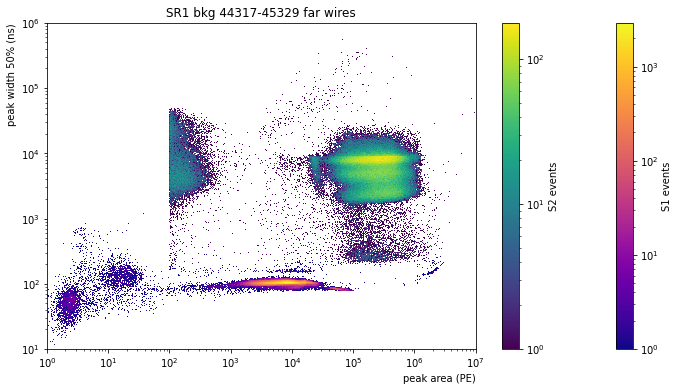

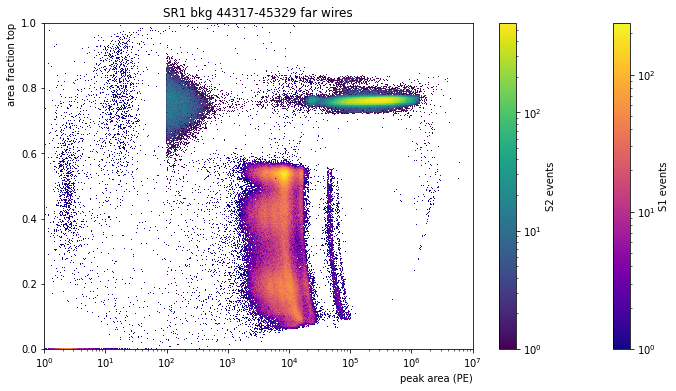

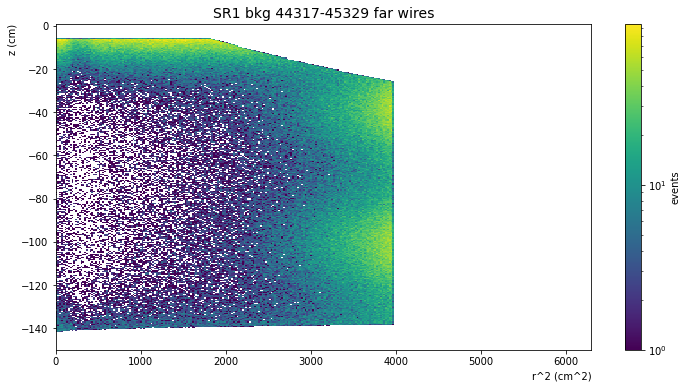

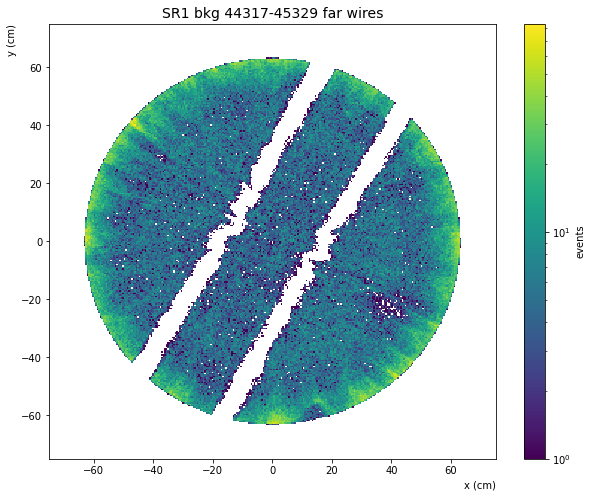

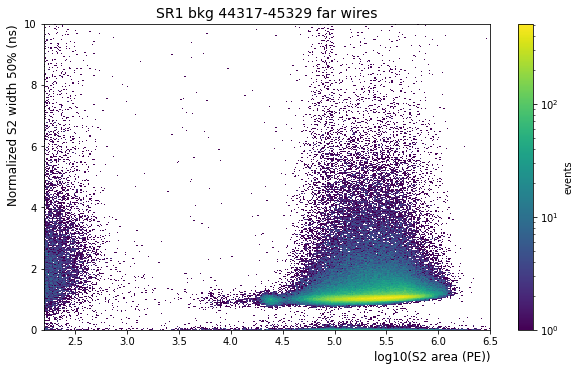

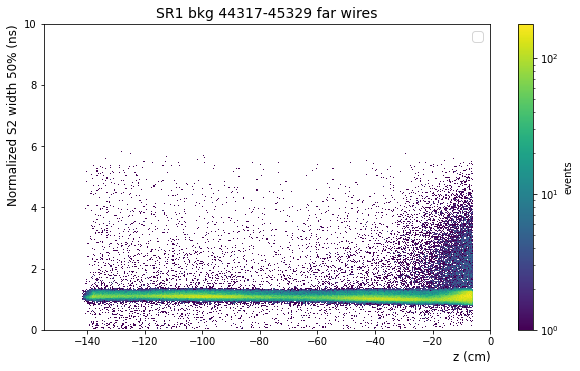

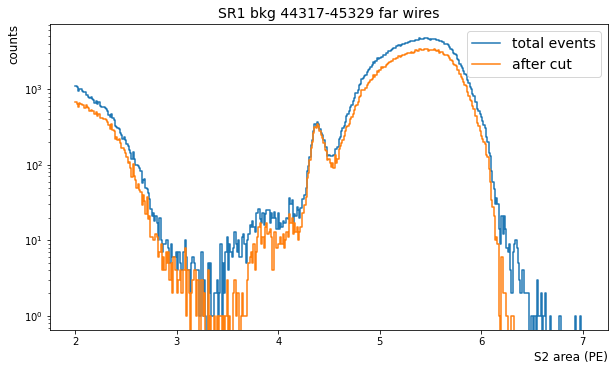

In [20]:
maskFW, maskNW = wcu.mask_S2Width_vs_pos(evbkg1)
maskFV = FiducialVolume.cut_by(evbkg1)
evv1 = evbkg1[maskFW & maskFV]
title='SR1 bkg 44317-45329 far wires'
ddu.plot_area_width_aft(evv1, title)
wcu.plot_r2z_xy(evv1,title)
cut_ = wcu.S2WidthCut(evv1, title=title, mod_par=par, bins=400,ext_par=fit_par,
                      wrange=(0,10), arange = (2.2,6.5), plot = 1, perc_plot=0)